In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def plot_metric_barplot_grouped(df, x, y, split, num_plots, per_plot, sort = "train_TF_loss", save_loc = None, hue = None, **plot_kwargs):
    fig, ax = plt.subplots(num_plots,1,figsize=(10,2.5*num_plots))
    df = df[df ["TF_split"] == split]
    sorted_list = df[df["loss_model"] == sort].sort_values(by=[y], ascending=False)["HGNC symbol"].to_list()
    if num_plots == 1:
        sns.barplot(ax=ax, data = df.set_index(["HGNC symbol"], drop=False).loc[sorted_list], x = x, y = y, hue=hue) #, palette=color_list[per_plot*i:per_plot*(i+1)])
        ax.set_ylim(0,1)
        ax.axhline(0.5, ls='--')
        ax.tick_params(axis='x', rotation=90)
    else:    
        for i in range(num_plots):
            sns.barplot(ax=ax[i], data = df.set_index(["HGNC symbol"], drop=False).loc[sorted_list[per_plot*i:per_plot*(i+1)]], x = x, y = y, hue=hue) #, palette=color_list[per_plot*i:per_plot*(i+1)])
            ax[i].set_ylim(0,1)
            ax[i].axhline(0.5, ls='--')
            ax[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    if save_loc:
        plt.savefig(save_loc)
    return fig, ax

In [28]:
#results = pd.read_csv("/home/natant/Thesis-plmbind/Results/20230325/Results.csv")
results = pd.read_csv("/home/data/shared/natant/Results/embs/emb480/Results.csv")
results = pd.read_csv("/home/data/shared/natant/Results/FullModel-esm320/DNA_branch_large/Results.csv")

In [29]:
results[results["TF_split"] == "val"]["DBD"].value_counts()

C2H2 ZF                    100
Nuclear receptor            58
GATA                        16
Homeodomain                 10
bHLH                        10
p53                          6
CSD                          4
Homeodomain; Paired box      4
Name: DBD, dtype: int64

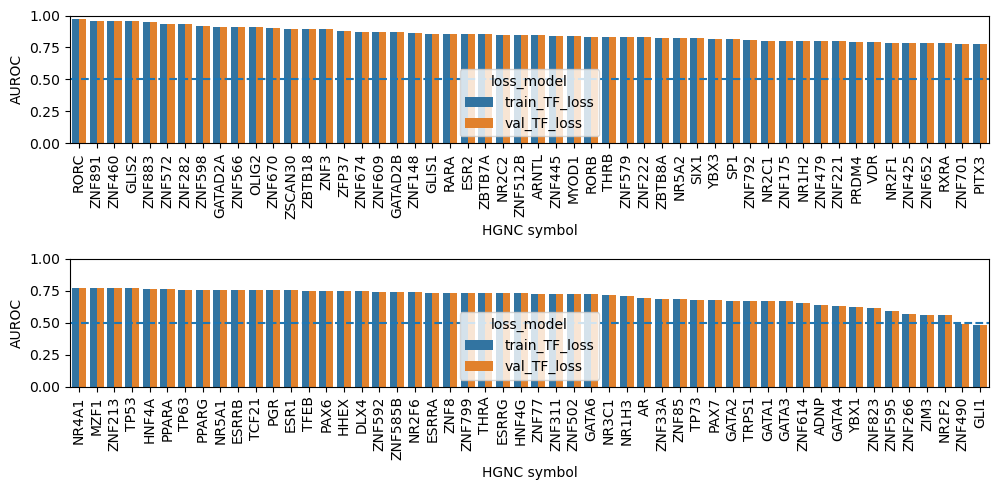

In [30]:
fig, ax = plot_metric_barplot_grouped(results, x = "HGNC symbol", y = "AUROC", split = "val", num_plots = 2, per_plot=52, hue="loss_model")

In [31]:
def val_plot_mosaic(df, x, y, sort = "train_TF_loss", save_loc = None, hue = None, **plot_kwargs):
    fig = plt.figure(figsize=(12, 6), layout="constrained")
    spec = fig.add_gridspec(2, 10)
    ax0 = fig.add_subplot(spec[0, :])
    ax10 = fig.add_subplot(spec[1, :2])
    ax11 = fig.add_subplot(spec[1, 2:4])
    ax12 = fig.add_subplot(spec[1, 4:])
    df = df[df ["TF_split"] == "val"]
    sorted_list = df[df["loss_model"] == sort].sort_values(by=[y], ascending=False)["HGNC symbol"].to_list()
    df = df.set_index(["HGNC symbol"], drop=False).loc[sorted_list]
    
    sns.barplot(ax=ax0, data = df[df["DBD"] == "C2H2 ZF"], x = x, y = y, hue=hue) #, palette=color_list[per_plot*i:per_plot*(i+1)])
    ax0.set_ylim(0,1)
    ax0.axhline(0.5, ls='--')
    ax0.tick_params(axis='x', rotation=90)
    
    sns.barplot(ax=ax10, data = df[df["DBD"] == "bHLH"], x = x, y = y, hue=hue) #, palette=color_list[per_plot*i:per_plot*(i+1)])
    ax10.set_ylim(0,1)
    ax10.axhline(0.5, ls='--')
    ax10.tick_params(axis='x', rotation=90)
    ax10.get_legend().remove()
    
    sns.barplot(ax=ax11, data = df[df["DBD"] == "Homeodomain"], x = x, y = y, hue=hue) #, palette=color_list[per_plot*i:per_plot*(i+1)])
    ax11.set_ylim(0,1)
    ax11.axhline(0.5, ls='--')
    ax11.tick_params(axis='x', rotation=90)
    ax11.get_legend().remove()
    
    sns.barplot(ax=ax12, data = df[~df["DBD"].isin(["Homeodomain", "bHLH", "C2H2 ZF"])], x = x, y = y, hue=hue) #, palette=color_list[per_plot*i:per_plot*(i+1)])
    ax12.set_ylim(0,1)
    ax12.axhline(0.5, ls='--')
    ax12.tick_params(axis='x', rotation=90)
    ax12.get_legend().remove()

    plt.tight_layout()
    if save_loc:
        plt.savefig(save_loc)
    return fig, ax

/tmp/ipykernel_15728/1101138642.py:35: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


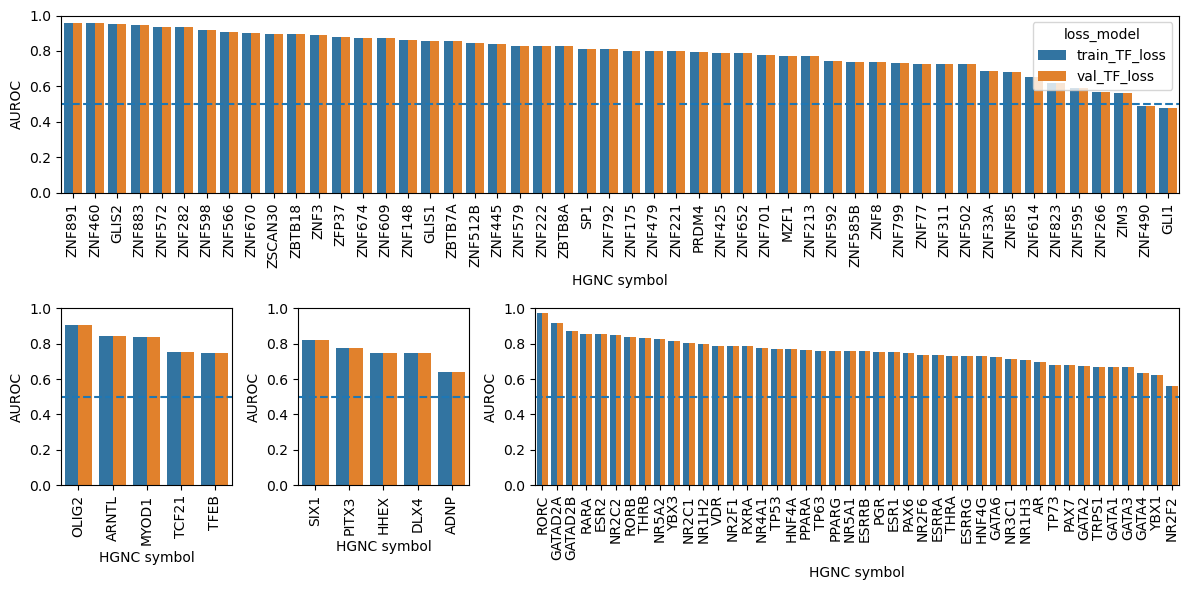

In [32]:
fig, ax = val_plot_mosaic(results, x = "HGNC symbol", y = "AUROC", hue="loss_model")

In [33]:
results["DBD_reduced"] = [i if i in ["C2H2 ZF", "Homeodomain", "bHLH"] else "other" for i in results["DBD"].to_list()]
results["loss_model_TF_split"] = results["loss_model"] + np.array(["___"] * len(results)) + results["TF_split"] + np.array(["_TFs"] * len(results))

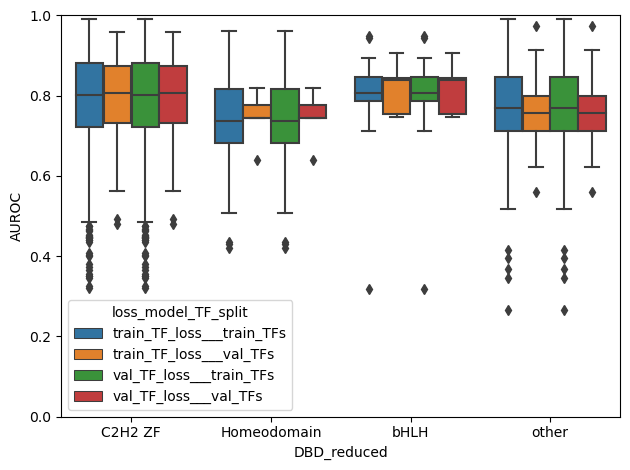

In [34]:
sns.boxplot(data=results, x = "DBD_reduced", y = "AUROC", hue = "loss_model_TF_split")
plt.ylim((0,1))
plt.tight_layout()

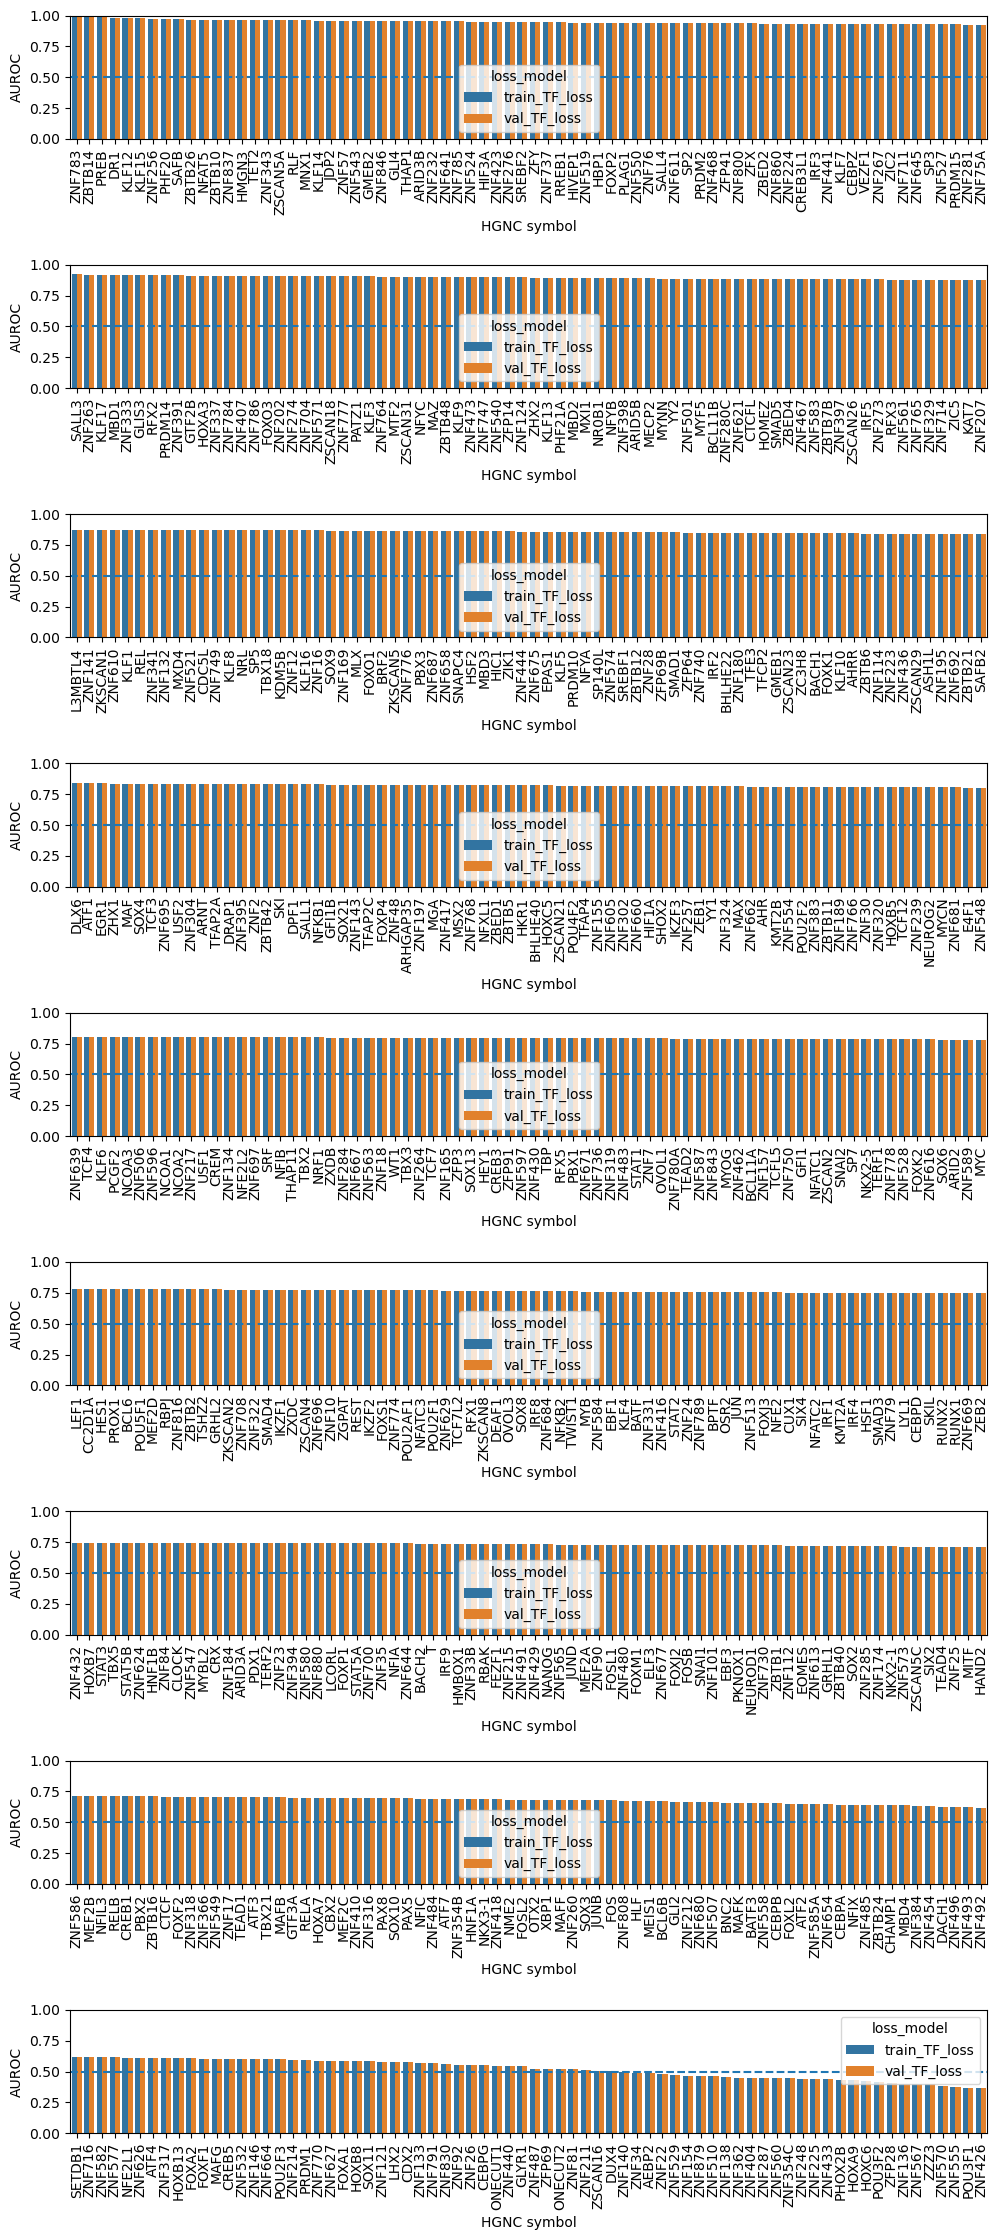

In [35]:
fig, ax = plot_metric_barplot_grouped(results, x = "HGNC symbol", y = "AUROC", split = "train", num_plots = 9, per_plot=72, hue="loss_model")

/tmp/ipykernel_15728/1101138642.py:35: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


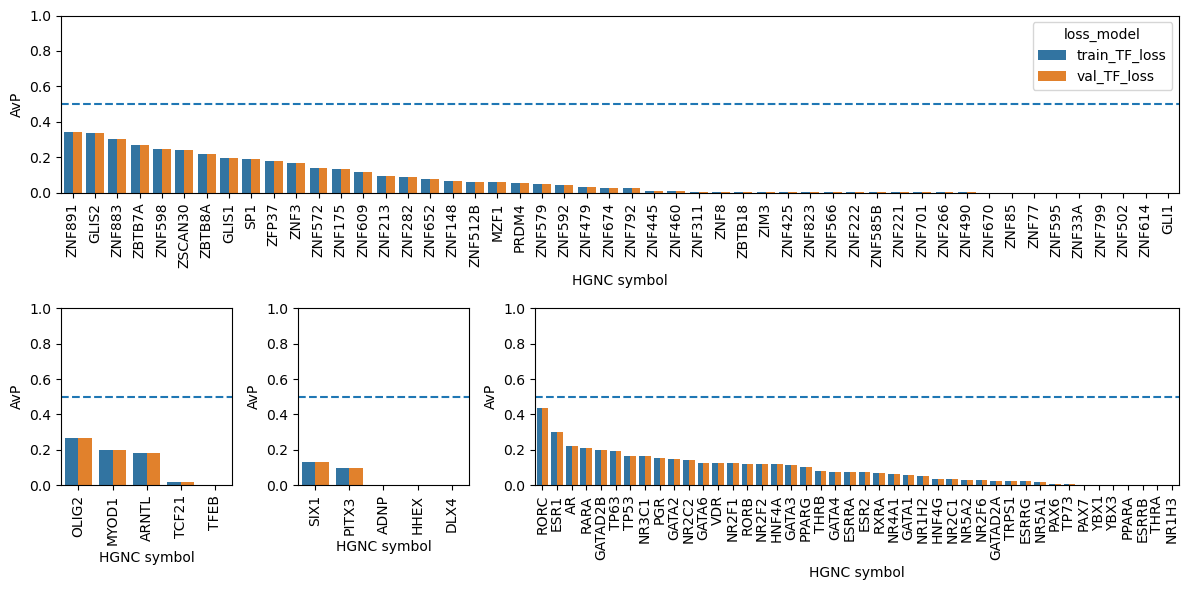

In [36]:
fig, ax = val_plot_mosaic(results, x = "HGNC symbol", y = "AvP", hue="loss_model")